In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
# Make API call
URL = "http://quickstats.nass.usda.gov/api/api_GET/?" + \
    "key={}&".format(os.environ["NASS_API_KEY"]) + \
    "commodity_desc=CORN&" + \
    "group_desc=FIELD CROPS&" + \
    "sector_desc=CROPS&" + \
    "source_desc=SURVEY&" + \
    "statisticcat_desc=YIELD&" + \
    "short_desc__NOT_LIKE=SILAGE&" + \
    "county_ansi__NE=''&" + \
    "year__GE=2000&" + \
    "state_alpha=NE&" + \
    "format=JSON"

response = requests.get(URL)  

# Create DataFrame
data = response.json()
df = pd.DataFrame(data["data"])

# Clean the data
df["Value"] = df.Value.map(float)
df["year"] = df.year.map(int) - 2000

data["data"][0]

{u'CV (%)': u'',
 u'Value': u'90.3',
 u'agg_level_desc': u'COUNTY',
 u'asd_code': u'10',
 u'asd_desc': u'NORTHWEST',
 u'begin_code': u'00',
 u'class_desc': u'ALL CLASSES',
 u'commodity_desc': u'CORN',
 u'congr_district_code': u'',
 u'country_code': u'9000',
 u'country_name': u'UNITED STATES',
 u'county_ansi': u'007',
 u'county_code': u'007',
 u'county_name': u'BANNER',
 u'domain_desc': u'TOTAL',
 u'domaincat_desc': u'NOT SPECIFIED',
 u'end_code': u'00',
 u'freq_desc': u'ANNUAL',
 u'group_desc': u'FIELD CROPS',
 u'load_time': u'2015-02-19 15:26:21',
 u'location_desc': u'NEBRASKA, NORTHWEST, BANNER',
 u'prodn_practice_desc': u'ALL PRODUCTION PRACTICES',
 u'reference_period_desc': u'YEAR',
 u'region_desc': u'',
 u'sector_desc': u'CROPS',
 u'short_desc': u'CORN, GRAIN - YIELD, MEASURED IN BU / ACRE',
 u'source_desc': u'SURVEY',
 u'state_alpha': u'NE',
 u'state_ansi': u'31',
 u'state_fips_code': u'31',
 u'state_name': u'NEBRASKA',
 u'statisticcat_desc': u'YIELD',
 u'unit_desc': u'BU / ACRE'

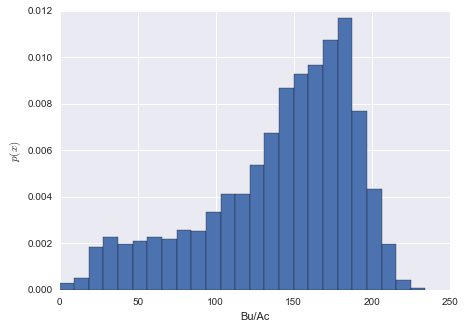

In [3]:
# Distribution of yield in Bu/Ac
plt.figure(figsize=(7, 5))
plt.hist(df.Value, bins=25, normed=True)
plt.xlabel("Bu/Ac")
plt.ylabel("$p(x)$")
plt.show()

In [13]:
# Fit OLS
X = sm.add_constant(df.year)
ols = sm.OLS(df.Value, X)
model = ols.fit()
b0, b1 = model.params.const, model.params.year
print model.summary().as_text()

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     233.7
Date:                Wed, 15 Apr 2015   Prob (F-statistic):           3.35e-51
Time:                        07:22:56   Log-Likelihood:                -19369.
No. Observations:                3686   AIC:                         3.874e+04
Df Residuals:                    3684   BIC:                         3.875e+04
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        122.6318      1.415     86.637      0.000       119.857   125.407
year           2.7353      0.179     15.287      0.0

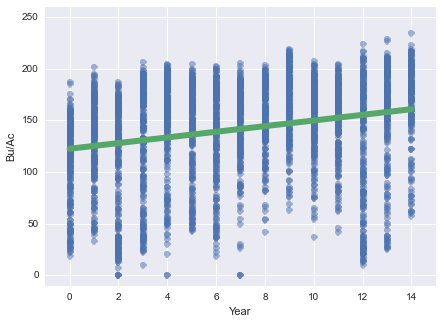

In [14]:
# Plot Bu/Ac vs. Year in Nebraska
xx = np.linspace(0, 14)
plt.figure(figsize=(7, 5))
plt.plot(df.year, df.Value, 'o', alpha=.5)
plt.plot(xx, b0 + b1*xx, lw=6)
plt.xlabel("Year")
plt.ylabel("Bu/Ac")
plt.xlim([-1, 15])
plt.ylim([-10, 260])
plt.show()